In [1]:
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
#compile the model, choose the loss, the optimizer and the metric
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [0]:
#Data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

In [8]:
epochs = 3
batch_size = 32
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/3





1875/1875 [==============================] - 41s 22ms/step - loss: 0.3637 - acc: 0.8851 - val_loss: 0.0410 - val_acc: 0.9866
Epoch 2/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1239 - acc: 0.9638 - val_loss: 0.0331 - val_acc: 0.9895
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0956 - acc: 0.9720 - val_loss: 0.0254 - val_acc: 0.9917


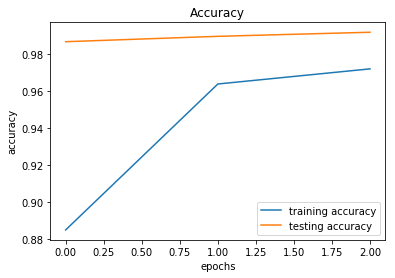

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

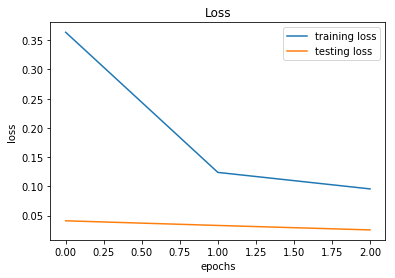

In [11]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()